In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import datetime as dt
%matplotlib inline

In [2]:
'''
Importing the text file which contains the chat of the group
in read mode using utf-8 encoding!
This is my clg group chat,it contains chats from 2018,so its a very big
file,will preview it after we've done adding regular expressions!

'''

f = open('D:\project_learning\DeepLearning\whatsap_chat_analyzer\whatsap_chat.txt','r',encoding='utf-8')

data = f.read()



In [3]:
dummy = data.split('\n')
dummy

['08/11/25, 6:41\u202fpm - Messages and calls are end-to-end encrypted. Only people in this chat can read, listen to, or share them. Learn more.',
 '01/12/24, 9:09\u202fpm - ~\u202fSaurabh Negi created group "Surabhi Kunj Announcement"',
 '01/12/24, 9:09\u202fpm - You were added',
 '07/11/25, 7:07\u202fpm - ~\u202fSudarshan Priya Das added ~\u202fAvijot_kumar, ~\u202fHimanshu and ~\u202fkumawatashish350',
 '07/11/25, 7:10\u202fpm - +91 75794 48679: Waiting for this message',
 '09/11/25, 6:41\u202fam - Nitai Prji IITR: https://share.google/jQtbdfuxdZuMEJ51I',
 '09/11/25, 7:21\u202fam - Ayush Jaiswal ❣❣: ',
 '12/11/25, 9:10\u202fpm - +91 72319 72301: *Relaxation in Morning  Program 😯*',
 '',
 'Writing of Mahamantra ✍️ is completely optional, when devotees come late for morning program.',
 '',
 'Devotees may write as per their convenience but writing mahamantra ✍🏻 is optional till the exam ends 📜',
 '',
 'Ys Shubham <This message was edited>',
 '13/11/25, 6:43\u202fam - Nitai Prji IITR: h

In [11]:
import re
import pandas as pd

# The raw data string from your export
data = """09/11/25, 6:41 am - Nitai Prji IITR: https://share.google/jQtbdfuxdZuMEJ51I
17/01/26, 8:15 pm - Himanshu Prabhu Iit: Tomorrow's Aarti and Worship"""

# Updated pattern to catch AM/PM and the hyphen
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s(?:am|pm)\s-\s'

# Extract messages and dates
messages = re.split(pattern, data)[1:]
dates = re.findall(pattern, data)

# Create lists to store final data
users = []
clean_messages = []

for message in messages:
    # Split by the first occurrence of ": " to separate user and message
    entry = re.split('([\w\W]+?):\s', message)
    if len(entry) > 1:
        users.append(entry[1])
        clean_messages.append(entry[2])
    else:
        # For system messages (like "You were added")
        users.append('System')
        clean_messages.append(entry[0])

# Final structured data
df = pd.DataFrame({'date': dates, 'user': users, 'message': clean_messages})
print(df.head())

                   date                 user  \
0  09/11/25, 6:41 am -       Nitai Prji IITR   
1  17/01/26, 8:15 pm -   Himanshu Prabhu Iit   

                                    message  
0  https://share.google/jQtbdfuxdZuMEJ51I\n  
1              Tomorrow's Aarti and Worship  


In [13]:
from datetime import datetime

# Your actual data format
raw_string = '08/11/25, 6:41 pm - '

try:
    # 1. Clean the string to remove the trailing hyphen and special spaces
    clean_string = raw_string.replace(' ', ' ').split(' - ')[0] # Handles the special \u202f space
    
    # 2. Parse directly into a date object
    # %y is 2-digit year, %p is AM/PM
    obj = datetime.strptime(clean_string, '%d/%m/%y, %I:%M %p')
    
    print(f"Date: {obj.date()} and Time: {obj.time()}")
    print(f"Hour: {obj.hour}") # This will correctly show 18 for 6 PM
    
except ValueError as e:
    print(f"Skipping line: {e}")

Date: 2025-11-08 and Time: 18:41:00
Hour: 18


In [14]:
# this function is to seperate the time and date

def gettimeanddate(string):
    string = string.split(',')
    date,time = string[0],string[1]
    time = time.split('-')
    time = time[0].strip()
    
    return date+" "+time




In [15]:
# creating a dataframe for messages and their dates

df = pd.DataFrame({'user_messages':messages,
                   'message_date':dates})

df['message_date'] = df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_messages,date
0,Nitai Prji IITR: https://share.google/jQtbdfux...,09/11/25 6:41 am
1,Himanshu Prabhu Iit: Tomorrow's Aarti and Worship,17/01/26 8:15 pm


In [16]:
df['user_messages']

0    Nitai Prji IITR: https://share.google/jQtbdfux...
1    Himanshu Prabhu Iit: Tomorrow's Aarti and Worship
Name: user_messages, dtype: object

In [17]:
'''
if we observe the usermessage,we find that the 
username is attached with the user message,so i need to get rid
of this,for that i will use the concept of the regular expression

sample of the regular expression output

['', 'Chinmayee', 'Hello this is official grup\n']

so here we can see that the username is at index 1 and message is at index2

sometimes it happens that we get the group notification,so 
for that case we have to handle it accordingly!


 Chinmayee: Hello this is official grup
 
 Chinmayee added you\n-->['Chinmayee added you','\n']

'''

users = []
messages = []

for message in df['user_messages']:
    
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])

        
    else:
        users.append('Group Notification')
        messages.append(entry[0])
        
        
df['User'] = users
df['message'] = messages


def getstring(text):
    return text.split('\n')[0]

df['message'] = df['message'].apply(lambda text:getstring(text))


df = df.drop(['user_messages'],axis=1)
df = df[['message','date','User']]

df = df.rename(columns={'message':'Message',
                       'date':'Date'})



df.head()

,Message,Date,User
0,https://share.google/jQtbdfuxdZuMEJ51I,09/11/25 6:41 am,Nitai Prji IITR
1,Tomorrow's Aarti and Worship,17/01/26 8:15 pm,Himanshu Prabhu Iit


In [19]:
# 1. Put the date in quotes so it is a string, not a number
raw_string = "09/11/25 6:41"

# 2. Parse the string (tell Python what the current format is)
# %d = Day, %m = Month, %y = 2-digit Year
date_obj = datetime.strptime(raw_string, "%d/%m/%y %H:%M")

# 3. Format the object into the YYYY-MM-DD string
final_date = date_obj.strftime("%Y-%m-%d")

print(final_date)
# Output: 2018-08-16

2025-11-09


In [20]:
df.shape

(2, 3)

In [21]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date

df['Year'] = pd.to_datetime(df['Date']).dt.year

df['Month_num'] = pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

df['Day'] = pd.to_datetime(df['Date']).dt.day

df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()


df['Hour'] = pd.to_datetime(df['Date']).dt.hour

df['Minute'] = pd.to_datetime(df['Date']).dt.minute


df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_12880\2879012235.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Only date'] = pd.to_datetime(df['Date']).dt.date
C:\Users\dell\AppData\Local\Temp\ipykernel_12880\2879012235.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Date']).dt.year
C:\Users\dell\AppData\Local\Temp\ipykernel_12880\2879012235.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month_num'] = pd.to_datetime(df['Date']).dt.month
C:\Users\dell\AppData\Local\Temp\ipykernel_12880\2879012235.py:7: UserWarning: Could not 

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,https://share.google/jQtbdfuxdZuMEJ51I,09/11/25 6:41 am,Nitai Prji IITR,2025-09-11,2025,9,September,11,Thursday,6,41
1,Tomorrow's Aarti and Worship,17/01/26 8:15 pm,Himanshu Prabhu Iit,2026-01-17,2026,1,January,17,Saturday,20,15


In [24]:
df[df['User'] == 'Nitai Prji IITR']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,https://share.google/jQtbdfuxdZuMEJ51I,09/11/25 6:41 am,Nitai Prji IITR,2025-09-11,2025,9,September,11,Thursday,6,41


In [25]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

5


In [26]:
words

['https://share.google/jQtbdfuxdZuMEJ51I',
 "Tomorrow's",
 'Aarti',
 'and',
 'Worship']

In [27]:
df[(df['Message'] == '<Media omitted>')&(df['User'] == 'Nitai Prji IITR')].shape

(0, 11)

In [28]:
df['Message'].unique()

array(['https://share.google/jQtbdfuxdZuMEJ51I',
       "Tomorrow's Aarti and Worship"], dtype=object)

In [29]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute


In [30]:
df['User'].value_counts().head()

User
Nitai Prji IITR        1
Himanshu Prabhu Iit    1
Name: count, dtype: int64

([0, 1], [Text(0, 0, 'Nitai Prji IITR'), Text(1, 0, 'Himanshu Prabhu Iit')])

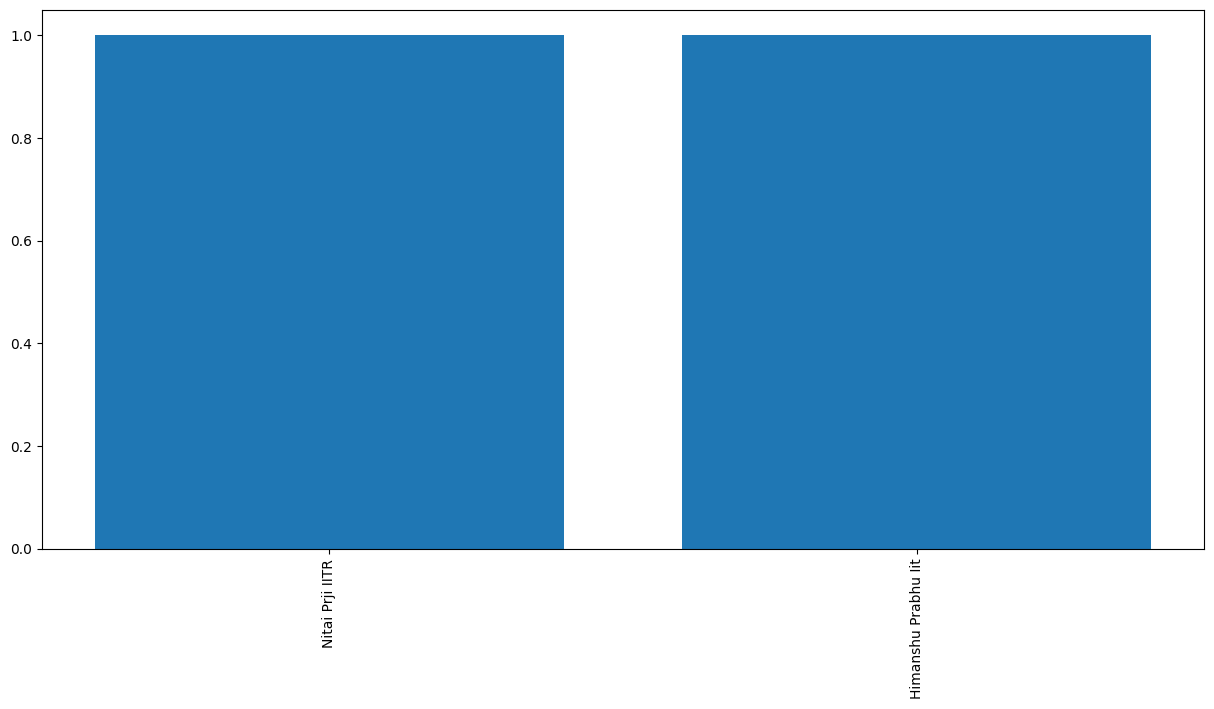

In [31]:
counts = df['User'].value_counts().head()
plt.figure(figsize=(15,7))
plt.bar(counts.index,counts.values)
plt.xticks(rotation = 'vertical')


In [32]:
# computationally heavy

wordmap = {}
for message in df['Message']:
    dummy = message.split()
    for word in dummy:
        if word in wordmap:
            wordmap[word]+=1
            
        else:
            wordmap[word] = 1
            
            
wordmap = dict(sorted(wordmap.items(),key = lambda x:x[1],reverse = True))

wordmap

{'https://share.google/jQtbdfuxdZuMEJ51I': 1,
 "Tomorrow's": 1,
 'Aarti': 1,
 'and': 1,
 'Worship': 1}

In [33]:
# top 20 words used in the whatsapp group

from collections import Counter
words = []
for message in df['Message']:
    words.extend(message.split())
    
wordmap = dict(Counter(words).most_common(20))
wordmap = dict(sorted(wordmap.items(),key=lambda x:x[1],reverse=True))
newdf = pd.DataFrame(wordmap.items())
newdf

,0,1
0,https://share.google/jQtbdfuxdZuMEJ51I,1
1,Tomorrow's,1
2,Aarti,1
3,and,1
4,Worship,1


In [35]:
temp = df[(df['User']!='Group Notification') | (df['User']!='<Media omitted>')]
temp

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,https://share.google/jQtbdfuxdZuMEJ51I,09/11/25 6:41 am,Nitai Prji IITR,2025-09-11,2025,9,September,11,Thursday,6,41
1,Tomorrow's Aarti and Worship,17/01/26 8:15 pm,Himanshu Prabhu Iit,2026-01-17,2026,1,January,17,Saturday,20,15


In [36]:
def gettopwords(selecteduser,df):

    # getting the stopwords

    file = open('stop_hinglish.txt','r')
    stopwords = file.read()
    stopwords = stopwords.split('\n')
    
    if selecteduser!='Overall':
        df = df[df['User']==selecteduser]
        
    temp = df[(df['User']!='Group Notification') |
             (df['User']!='<Media omitted>')]
    
    words = []
    
    for message in df['Message']:
        for word in message.lower().split():
            if word not in stopwords:
                words.append(word)
                
    
    mostcommon = pd.DataFrame(Counter(words).most_common(20))
    return mostcommon



mostcommon = gettopwords('Overall',df)

mostcommon


,0,1
0,https://share.google/jqtbdfuxdzumej51i,1
1,tomorrow's,1
2,aarti,1
3,worship,1


In [37]:
import emoji

In [39]:
import emoji
from collections import Counter
import pandas as pd

def emojihelp(selecteduser, df):
    if selecteduser != 'Overall':
        df = df[df['User'] == selecteduser]
        
    emojis = []
    for message in df['Message']:
        # Updated this line to use EMOJI_DATA
        emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
        
    emojidf = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))
    
    # Optional: Rename columns for better readability
    if not emojidf.empty:
        emojidf.columns = ['Emoji', 'Count']
        
    return emojidf

dfmoji = emojihelp('Overall', df)

In [43]:
import emoji
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

def emojihelp(selecteduser, df):
    if selecteduser != 'Overall':
        df = df[df['User'] == selecteduser]
        
    emojis = []
    # Using astype(str) to avoid errors with empty messages
    for message in df['Message'].astype(str):
        emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
    
    if not emojis:
        return pd.DataFrame(columns=['Emoji', 'Count'])

    # Counter().most_common() returns a list of tuples: [('😂', 5), ('❤️', 3)]
    emojidf = pd.DataFrame(Counter(emojis).most_common(), columns=['Emoji', 'Count'])
    
    return emojidf

# 1. Get the data
dfmoji = emojihelp('Overall', df)

# 2. Check if it's empty before plotting
if not dfmoji.empty:
    top_5 = dfmoji.head(5)
    plt.figure(figsize=(8, 6))
    # Using the column names we defined in the function
    plt.pie(top_5['Count'], labels=top_5['Emoji'], autopct='%1.1f%%')
    plt.title("Top 5 Emojis Used")
    plt.show()
else:
    print("No emojis found in the chat!")

No emojis found in the chat!


In [44]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,https://share.google/jQtbdfuxdZuMEJ51I,09/11/25 6:41 am,Nitai Prji IITR,2025-09-11,2025,9,September,11,Thursday,6,41
1,Tomorrow's Aarti and Worship,17/01/26 8:15 pm,Himanshu Prabhu Iit,2026-01-17,2026,1,January,17,Saturday,20,15


In [46]:
def monthtimeline(selecteduser, df):
    # 1. Filter by user if necessary
    if selecteduser != 'Overall':
        df = df[df['User'] == selecteduser]

    # 2. Group and count
    # We sort by Year and Month_num to keep the timeline chronological
    temp = df.groupby(['Year', 'Month_num', 'Month']).count()['Message'].reset_index()
    temp = temp.sort_values(['Year', 'Month_num'])

    # 3. Create the "Month-Year" string
    time = []
    for i in range(temp.shape[0]):
        # Use .iloc to get the value based on row position, not index label
        time.append(temp.iloc[i]['Month'] + "-" + str(temp.iloc[i]['Year']))

    temp['Time'] = time
    
    return temp

# Usage
timeline = monthtimeline('Overall', df)

In [47]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,https://share.google/jQtbdfuxdZuMEJ51I,09/11/25 6:41 am,Nitai Prji IITR,2025-09-11,2025,9,September,11,Thursday,6,41
1,Tomorrow's Aarti and Worship,17/01/26 8:15 pm,Himanshu Prabhu Iit,2026-01-17,2026,1,January,17,Saturday,20,15


In [48]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2025,9,September,1
1,2026,1,January,1


In [49]:
temp = df.groupby(['Year','Month_num','Month']).count()['Message'].reset_index()
temp

,Year,Month_num,Month,Message
0,2025,9,September,1
1,2026,1,January,1


In [50]:
temp.shape

(2, 4)

In [51]:
str(temp['Month'][0])+"-"+str(temp['Year'][0])

'September-2025'

In [52]:
time = []
for i in range(temp.shape[0]):
    time.append(temp['Month'][i]+ "-" +str(temp['Year'][i]))
    
temp['Time'] = time

temp

,Year,Month_num,Month,Message,Time
0,2025,9,September,1,September-2025
1,2026,1,January,1,January-2026


In [53]:
temp

,Year,Month_num,Month,Message,Time
0,2025,9,September,1,September-2025
1,2026,1,January,1,January-2026


In [54]:
df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,https://share.google/jQtbdfuxdZuMEJ51I,09/11/25 6:41 am,Nitai Prji IITR,2025-09-11,2025,9,September,11,Thursday,6,41
1,Tomorrow's Aarti and Worship,17/01/26 8:15 pm,Himanshu Prabhu Iit,2026-01-17,2026,1,January,17,Saturday,20,15


In [55]:
temp1 = df['Day_name'].value_counts()

In [56]:
temp1

Day_name
Thursday    1
Saturday    1
Name: count, dtype: int64

In [57]:
list(temp1.index)

['Thursday', 'Saturday']

In [58]:
list(temp1.values)

[1, 1]

In [59]:
temp2 = df['Month'].value_counts()

In [60]:
temp2

Month
September    1
January      1
Name: count, dtype: int64

In [61]:
list(temp2.index),list(temp2.values)

(['September', 'January'], [1, 1])